# NAME - RIDDHI PATIL
# ROLL NO. - 52
# BRANCH - SE AIML
# DATE - 09/02/2026

# Exp-4 - To implement and evaluate Logistic Regression, Decision Tree, and kNN algorithms on a labeled dataset and compare their classification performance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

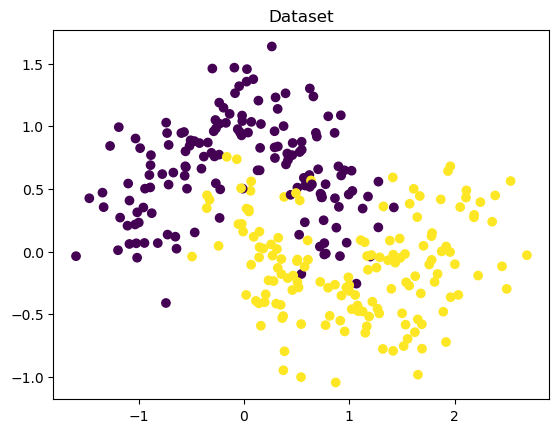

In [4]:
x,y = make_moons(n_samples=300, noise=0.25, random_state=42)

plt.scatter(x[:,0], x[:,1], c=y)
plt.title("Dataset")
plt.show()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=0
)

In [6]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)
y_pred_lr = lr.predict(x_test_scaled)

In [8]:
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression
Accuracy: 0.8777777777777778
Confusion Matrix:
 [[34  5]
 [ 6 45]]


In [9]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [10]:
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree
Accuracy: 0.8555555555555555
Confusion Matrix:
 [[30  9]
 [ 4 47]]


In [28]:
kn = KNeighborsClassifier(n_neighbors=51)
kn.fit(x_train_scaled, y_train)
y_pred_kn = kn.predict(x_test_scaled)

In [29]:
print("\nKNN")
print("Accuracy:", accuracy_score(y_test, y_pred_kn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_kn))


KNN
Accuracy: 0.9
Confusion Matrix:
 [[35  4]
 [ 5 46]]


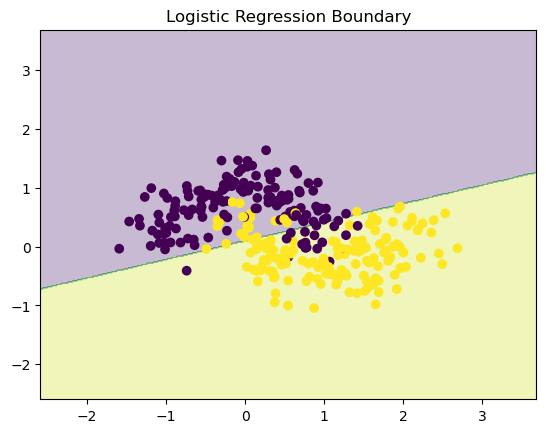

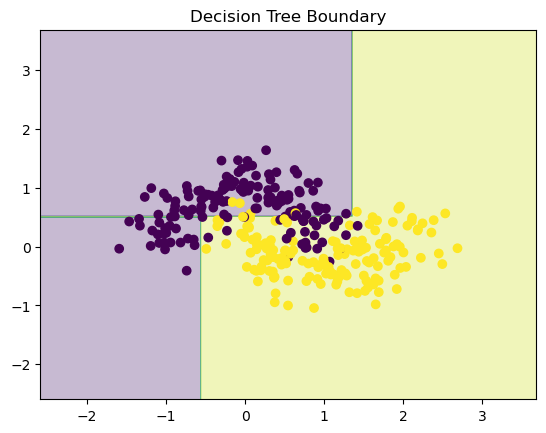

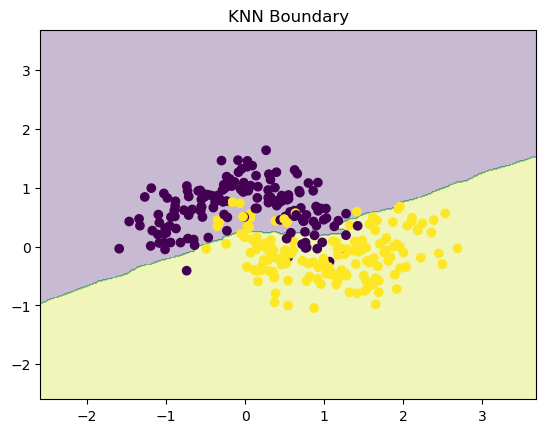

In [30]:
def plot_boundary(model, scaled, title):
    h = 0.02
    x_min, x_max = x[:,0].min()-1, x[:,0].max()+1
    y_min, y_max = x[:,0].min()-1, x[:,0].max()+1

    xx, yy = np.meshgrid(np.arange(x_min, x_max,h),
                        np.arange(y_min, y_max,h))
    grid = np.c_[xx.ravel(), yy.ravel()]

    if scaled:
        grid = scaler.transform(grid)

    z = model.predict(grid)
    z = z.reshape(xx.shape)

    plt.contourf(xx, yy, z, alpha=0.3)
    plt.scatter(x[:,0], x[:,1], c=y)
    plt.title(title)
    plt.show()

plot_boundary(lr, True, "Logistic Regression Boundary")
plot_boundary(dt, False, "Decision Tree Boundary")
plot_boundary(kn, True, "KNN Boundary")